**Machine Learning Assignment 1 - Group B**

In [271]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

import pandas as pd

df1=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_01.csv', sep=";")
df2=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_02.csv', sep=";")
#df3=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/peugeot_207_01.csv', sep=";")
#df4=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/peugeot_207_02.csv', sep=";")

#allframes = [df1,df2,df3,df4]
allframes = [df1, df2]

feature_names = list(df1.head(0))
feature_names.pop(0)

print(feature_names)


['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle']


In [272]:
x = feature_names
#df.count(axis='columns')

In [273]:
print(df1.shape)

(7038, 18)


In [274]:
df = pd.concat(allframes)
df3 = pd.concat(allframes)
#print out first 5 rows of data set
df.head()
df3.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [275]:
df.drop(['Unnamed: 0', 'traffic'], axis=1, inplace=True)
df3.drop(['Unnamed: 0', 'traffic'], axis=1, inplace=True)
df3.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,EvenPaceStyle


In [276]:
df3.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,-0.478689,39.021730,39.185487,194.612717,-0.022943,0.680345,29.436817,76.253369,119.002875,1601.092902,17.185517,16.957862,1.528442,16.164601
std,2.036172,34.845227,31.849461,192.573430,2.332198,2.069489,21.412885,9.869676,25.184805,561.948593,10.678724,4.196808,4.794766,5.073774
min,-9.200012,0.000000,0.000000,0.000000,-17.789218,-2.380000,0.000000,40.000000,98.000000,752.000000,4.010000,7.000000,-1.246000,7.271883
25%,-1.700012,9.513855,15.837660,49.953278,-0.900721,-0.301000,16.470589,77.000000,102.000000,1000.250000,8.180000,14.000000,-0.136700,12.028536
50%,-0.200012,30.849661,27.730916,128.287362,0.000000,0.133000,26.274509,80.000000,109.000000,1694.000000,15.480000,17.000000,0.125000,15.909114
75%,0.399963,58.096436,54.418498,274.462603,0.900721,0.734300,39.607845,82.000000,125.000000,2086.000000,22.677500,19.000000,0.386700,19.982862
max,10.700012,124.749725,121.330733,1051.789888,12.384899,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,34.000000,17.944800,45.336861


In [277]:
print(df3.shape)

(11130, 16)


In [278]:
#xx = df.iloc[:,[1,2]] 
scaling= df3.iloc[:,0:14]


In [279]:
scaling.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638


In [280]:
min_max_scaler = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit(scaling) 
rescaled = x_after_min_max_scaler.transform(scaling)

In [281]:
print(rescaled[:15,:4])

[[-0.89451217 -0.38317476 -0.81518342 -0.37919721]
 [-0.79627826 -0.42841282 -0.80213965 -0.38527371]
 [-0.50160649 -0.46718831 -0.78982731 -0.39548223]
 [ 0.28423484 -0.48011345 -0.78543049 -0.40008048]
 [ 0.28420488 -0.44133796 -0.78047318 -0.40266226]
 [ 0.28423484 -0.4090251  -0.76751069 -0.4120391 ]
 [ 0.38246875 -0.38963739 -0.75501955 -0.41804725]
 [ 0.38243879 -0.35086185 -0.74146785 -0.42491624]
 [ 0.33333682 -0.31208636 -0.72756263 -0.42926978]
 [ 0.52980464 -0.26684824 -0.71271468 -0.43283129]
 [ 0.48067271 -0.21514761 -0.69704184 -0.4338107 ]
 [ 0.43157073 -0.13759664 -0.67913003 -0.43476043]
 [-0.05959883 -0.09235847 -0.66062901 -0.43304371]
 [-0.20690475 -0.05358304 -0.64118526 -0.43224593]
 [-0.3542706   0.01104269 -0.62056311 -0.42801534]]


In [282]:
minmaxscaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = minmaxscaler.fit_transform(scaling)

In [283]:
print(x_after_min_max_scaler[:15,:5])

[[0.34673447 0.20577616 0.10898723 0.11560549 0.50746266]
 [0.35678532 0.19314078 0.11241108 0.11449299 0.53731343]
 [0.38693481 0.18231046 0.11564294 0.11262399 0.54477611]
 [0.46733856 0.17870035 0.11679706 0.11178212 0.57462688]
 [0.4673355  0.18953068 0.1180983  0.11130944 0.63432835]
 [0.46733856 0.19855593 0.12150082 0.1095927  0.62686561]
 [0.47738941 0.20397109 0.12477961 0.10849271 0.61194026]
 [0.47738635 0.21480143 0.12833679 0.10723512 0.63432841]
 [0.47236246 0.22563175 0.13198676 0.10643806 0.63432835]
 [0.49246416 0.23826714 0.13588419 0.10578601 0.64179109]
 [0.4874372  0.25270757 0.13999814 0.1056067  0.6492537 ]
 [0.48241331 0.27436822 0.1446998  0.10543282 0.67910447]
 [0.43215905 0.28700362 0.14955613 0.10574712 0.64179115]
 [0.41708737 0.29783393 0.1546599  0.10589318 0.63432829]
 [0.40200956 0.31588445 0.160073   0.10666773 0.66417899]]


In [284]:
x_after_min_max_scaler.shape

(11130, 14)

In [285]:
df3 = df3.iloc[:,:14]

In [286]:
df3.shape

(11130, 14)

In [287]:
df3.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638


In [288]:
df3.shape

(11130, 14)

In [289]:
#df[0:,:14]= x_after_min_max_scaler

In [290]:
x_after_min_max_scaler.shape

(11130, 14)

In [291]:
x_after_min_max_scaler[0,0]

0.3467344693306004

In [292]:
xxx = df3.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xxx)
df4 = pd.DataFrame(x_scaled)

In [293]:
#df[0:1,0:1]=x_after_min_max_scaler[0:1,0:1]

In [294]:
df4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.346734,0.205776,0.108987,0.115605,0.507463,0.251939,0.047059,0.571429,0.051948,0.432298,0.170422,0.629630,0.059023,0.321173
1,0.356785,0.193141,0.112411,0.114493,0.537313,0.260568,0.105882,0.571429,0.032468,0.387992,0.153668,0.555556,0.058210,0.321656
2,0.386935,0.182310,0.115643,0.112624,0.544776,0.258413,0.274510,0.571429,0.032468,0.350725,0.113229,0.518519,0.058007,0.319713
3,0.467339,0.178700,0.116797,0.111782,0.574627,0.257327,0.243137,0.591837,0.038961,0.359420,0.118429,0.481481,0.060451,0.318321
4,0.467335,0.189531,0.118098,0.111309,0.634328,0.255531,0.200000,0.591837,0.038961,0.395859,0.114096,0.518519,0.061467,0.316032


In [295]:
df3.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638


In [296]:
df4.columns = df3.columns

In [297]:
df4.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,0.346734,0.205776,0.108987,0.115605,0.507463,0.251939,0.047059,0.571429,0.051948,0.432298,0.170422,0.629630,0.059023,0.321173
1,0.356785,0.193141,0.112411,0.114493,0.537313,0.260568,0.105882,0.571429,0.032468,0.387992,0.153668,0.555556,0.058210,0.321656
2,0.386935,0.182310,0.115643,0.112624,0.544776,0.258413,0.274510,0.571429,0.032468,0.350725,0.113229,0.518519,0.058007,0.319713
3,0.467339,0.178700,0.116797,0.111782,0.574627,0.257327,0.243137,0.591837,0.038961,0.359420,0.118429,0.481481,0.060451,0.318321
4,0.467335,0.189531,0.118098,0.111309,0.634328,0.255531,0.200000,0.591837,0.038961,0.395859,0.114096,0.518519,0.061467,0.316032


In [298]:
df.describe(include=[np.object])

,roadSurface,drivingStyle
count,11130,11130
unique,2,2
top,SmoothCondition,EvenPaceStyle
freq,10685,9041


In [299]:
df['drivingStyle'] = df.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df['roadSurface']= df.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})

In [300]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for opel_corsa_01', fontsize=15)
    plt.show()

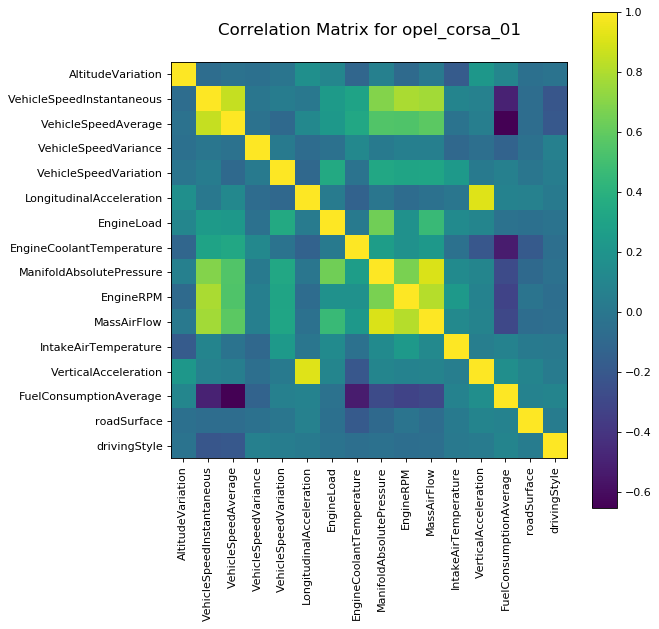

In [301]:
plotCorrelationMatrix(df, 8)

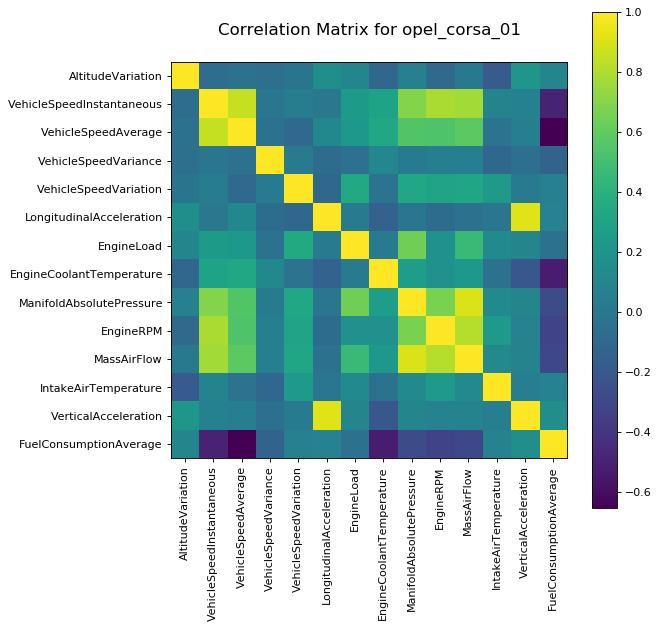

In [302]:
plotCorrelationMatrix(df4, 8)

Before balancing data, see how classifiers perform:


In [303]:
list(df.columns)

['AltitudeVariation',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedAverage',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'LongitudinalAcceleration',
 'EngineLoad',
 'EngineCoolantTemperature',
 'ManifoldAbsolutePressure',
 'EngineRPM',
 'MassAirFlow',
 'IntakeAirTemperature',
 'VerticalAcceleration',
 'FuelConsumptionAverage',
 'roadSurface',
 'drivingStyle']

In [304]:
features = ['AltitudeVariation','VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']

In [305]:
X = df[features]
X.head()


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638


In [306]:
print(X.shape)

(11130, 14)


In [307]:

#feature_names.pop(16)
#feature_names.pop(15)
#feature_names.pop(14)
#print(feature_names)
#for i in feature_names:
#        df[i].fillna(df[i].mean(), inplace=True)

In [308]:
#df.describe()

In [309]:
#plotCorrelationMatrix(df, 8)

In [310]:
y = df['drivingStyle']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8347, 14)
(2783, 14)
(8347,)
(2783,)


In [312]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)


0.1814588573481854
0.8185411426518145


=> Even if Even Driving Style is predicted always, the accuracy would be **81.8%**
=> We need to design a classifer that provides better accuracy than this!

In [313]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [314]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.8192597915918074
Precision:  0.5138888888888888
Recall:  0.07326732673267326
F1 Score:  0.07326732673267326
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      2278
           1       0.51      0.07      0.13       505

    accuracy                           0.82      2783
   macro avg       0.67      0.53      0.51      2783
weighted avg       0.77      0.82      0.76      2783

Confusion Matrix: 
 [[2243   35]
 [ 468   37]]


In [315]:
logreg = LogisticRegression(solver='liblinear',class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
y_pred = logreg.predict(X_test)

print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.6083363277039167
Precision:  0.28317272053372866
Recall:  0.7564356435643564
F1 Score:  0.7564356435643564
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.58      0.71      2278
           1       0.28      0.76      0.41       505

    accuracy                           0.61      2783
   macro avg       0.60      0.67      0.56      2783
weighted avg       0.80      0.61      0.65      2783

Confusion Matrix: 
 [[1311  967]
 [ 123  382]]


In [317]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y2_pred = knn.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y2_pred))
print("Precision: ", metrics.precision_score(y_test, y2_pred))
print("Recall: ", metrics.recall_score(y_test, y2_pred))
print("F1 Score: ", metrics.recall_score(y_test, y2_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y2_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y2_pred))

Compare actual response with predicted (accuracy):  0.8196191160618038
Precision:  0.5043227665706052
Recall:  0.3465346534653465
F1 Score:  0.3465346534653465
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2278
           1       0.50      0.35      0.41       505

    accuracy                           0.82      2783
   macro avg       0.68      0.64      0.65      2783
weighted avg       0.80      0.82      0.81      2783

Confusion Matrix: 
 [[2106  172]
 [ 330  175]]


In [318]:
from sklearn import svm
modelsvm = svm.SVC(kernel ='linear')
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [319]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.8192597915918074
Precision:  0.5192307692307693
Recall:  0.053465346534653464
F1 Score:  0.053465346534653464
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      2278
           1       0.52      0.05      0.10       505

    accuracy                           0.82      2783
   macro avg       0.67      0.52      0.50      2783
weighted avg       0.77      0.82      0.75      2783

Confusion Matrix: 
 [[2253   25]
 [ 478   27]]


In [320]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced')
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [321]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.5939633489040603
Precision:  0.2813156053184045
Recall:  0.7960396039603961
F1 Score:  0.7960396039603961
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.55      0.69      2278
           1       0.28      0.80      0.42       505

    accuracy                           0.59      2783
   macro avg       0.60      0.67      0.55      2783
weighted avg       0.81      0.59      0.64      2783

Confusion Matrix: 
 [[1251 1027]
 [ 103  402]]


Balancing the DataSet then rerun Olivia Code to show metrics and confusion matrx if results improve or not?

In [322]:
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,0,0
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,0,0
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,0,0
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,0,0
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,0,0


In [ ]:
target_count = df.drivingStyle.value_counts()
print('EvenPAceStyle or Class 0:', target_count[0])
print('AgressivePaceStyle or Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='drivingStyle (target)');

Balancing using Python Imbalanced-Learn Module - Random UnderSampling

In [327]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Removed indexes: [4276 3747  707 ... 8343 8344 8345]


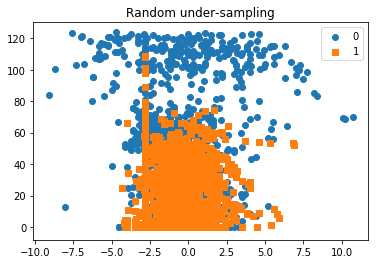

In [329]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2376, 14)
(792, 14)
(2376,)
(792,)


In [331]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)

0.494949494949495
0.505050505050505


In [332]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [333]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.6704545454545454
Precision:  0.6465324384787472
Recall:  0.7372448979591837
F1 Score:  0.7372448979591837
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.60      0.65       400
           1       0.65      0.74      0.69       392

    accuracy                           0.67       792
   macro avg       0.67      0.67      0.67       792
weighted avg       0.67      0.67      0.67       792

Confusion Matrix: 
 [[242 158]
 [103 289]]


Balancing using Python Imbalanced-Learn Module - Random OverSampling

6952 new random picked points


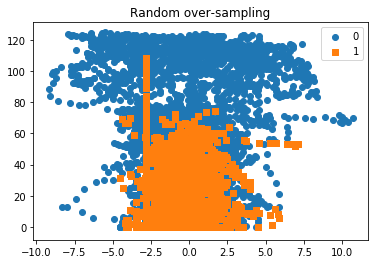

In [334]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13561, 14)
(4521, 14)
(13561,)
(4521,)


In [336]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)

0.5014377350143774
0.4985622649856226


In [337]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [338]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.6655607166556071
Precision:  0.6421845574387948
Recall:  0.7520952801058668
F1 Score:  0.7520952801058668
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.58      0.63      2254
           1       0.64      0.75      0.69      2267

    accuracy                           0.67      4521
   macro avg       0.67      0.67      0.66      4521
weighted avg       0.67      0.67      0.66      4521

Confusion Matrix: 
 [[1304  950]
 [ 562 1705]]


In [353]:
from sklearn import svm
#modelsvm = svm.SVC(kernel ='linear')
#modelsvm.fit(X_train, y_train)


In [354]:

modelsvm = svm.SVC(kernel ='linear',class_weight='balanced', tol=0.001)
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [355]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.6640123866401239
Precision:  0.6286992429456297
Recall:  0.8059108954565505
F1 Score:  0.8059108954565505
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.52      0.61      2254
           1       0.63      0.81      0.71      2267

    accuracy                           0.66      4521
   macro avg       0.68      0.66      0.66      4521
weighted avg       0.68      0.66      0.66      4521

Confusion Matrix: 
 [[1175 1079]
 [ 440 1827]]


re-running svm.SVC(kernel ='linear',class_weight='balanced') on undersampled data

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2376, 14)
(792, 14)
(2376,)
(792,)


In [347]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced', tol=0.1)
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.1, verbose=False)

In [348]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.678030303030303
Precision:  0.6604215456674473
Recall:  0.7193877551020408
F1 Score:  0.7193877551020408
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       400
           1       0.66      0.72      0.69       392

    accuracy                           0.68       792
   macro avg       0.68      0.68      0.68       792
weighted avg       0.68      0.68      0.68       792

Confusion Matrix: 
 [[255 145]
 [110 282]]


performing svm on rescaled features and oversampled data

In [356]:
X = df4[features]
X.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,0.346734,0.205776,0.108987,0.115605,0.507463,0.251939,0.047059,0.571429,0.051948,0.432298,0.170422,0.629630,0.059023,0.321173
1,0.356785,0.193141,0.112411,0.114493,0.537313,0.260568,0.105882,0.571429,0.032468,0.387992,0.153668,0.555556,0.058210,0.321656
2,0.386935,0.182310,0.115643,0.112624,0.544776,0.258413,0.274510,0.571429,0.032468,0.350725,0.113229,0.518519,0.058007,0.319713
3,0.467339,0.178700,0.116797,0.111782,0.574627,0.257327,0.243137,0.591837,0.038961,0.359420,0.118429,0.481481,0.060451,0.318321
4,0.467335,0.189531,0.118098,0.111309,0.634328,0.255531,0.200000,0.591837,0.038961,0.395859,0.114096,0.518519,0.061467,0.316032


In [357]:
print(X.shape)

(11130, 14)


In [394]:
y = df['drivingStyle']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

In [395]:
print(y.shape)

(11130,)


In [396]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8347, 14)
(2783, 14)
(8347,)
(2783,)


2396 new random picked points


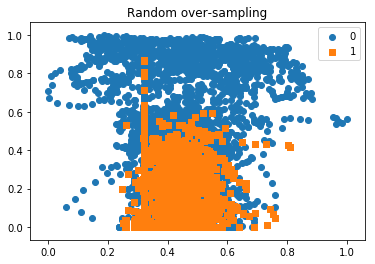

In [397]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [398]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced', tol=0.001)
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [399]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.5454545454545454
Precision:  0.2668711656441718
Recall:  0.8613861386138614
F1 Score:  0.8613861386138614
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.48      0.63      2278
           1       0.27      0.86      0.41       505

    accuracy                           0.55      2783
   macro avg       0.60      0.67      0.52      2783
weighted avg       0.82      0.55      0.59      2783

Confusion Matrix: 
 [[1083 1195]
 [  70  435]]


In [400]:
from sklearn.preprocessing import label_binarize

In [408]:
y = label_binarize(y, classes=[0,1])
n_classes = y.shape[1]

In [409]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [410]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y3_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y3_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: Can only tuple-index with a MultiIndex

In [404]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

KeyError: 2

<Figure size 432x288 with 0 Axes>